# Kormanyos with Rashba

## Import statements

In [1]:
# From Anaconda:
import numpy as np
import numpy.linalg as LA

from mpl_toolkits.mplot3d import axes3d
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
## Turn the parent directory visible for importing
import sys
sys.path.insert(1,'../')

In [3]:
# From this repository:
import treat_files as files
import band_structure as bs

In [4]:
#  Font definitions for the plots
FONT_LABELS = 20
FONT_TITLES = 22
font = {'family' : 'serif', 'weight' : 'bold', 'size': FONT_LABELS}
mpl.rc('font', **font)
plt.rc('text', usetex=True)

In [5]:
# IMPORTANT MATRICES 
σ_x = np.array([[ 0., 1.],
                [ 1., 0.]])
σ_y = np.array([[ 0.,-1j],
                [ 1j, 0.]])
σ_z = np.array([[ 1., 0.],
                [ 0.,-1.]])

I = np.identity(2)
Σ_x = np.kron(I, σ_x)
Σ_y = np.kron(I, σ_y)
Σ_z = np.kron(I, σ_z)

In [6]:
def avg_operator(Op, Vector):
    return Vector.conj() @ Op @ Vector

In [7]:
def avg_op_bands(Op, Vectors):
    S = np.empty_like(Vectors[:,:,0])
    Nk, Nb = S.shape
    for i in range(Nk):
        for j in range(Nb):
            S[i,j] = avg_operator(Op, Vectors[i,:,j])
    return S

## Modified main function of `band_structure`

In [8]:
# READ THE "infile.txt"
params = files.read_params("../infile_4x4_Rashba.txt")
Ham, r_0, epsilon, exchange, d_chosen, Lk, n_mesh, n_sub, submesh_radius, n_rec_states = files.pop_out_model(params)


for k in params.keys():
    print("{:15s} = {:7.1f}".format(k, params[k]))

E_c             =  2800.0
E_v             =     0.0
alpha_up        =   -24.0
alpha_dn        =   -28.4
beta_up         =    45.7
beta_dn         =    43.3
gamma           =   222.0
gamma_z         =     1.0
delta_c         =    -1.5
delta_v         =    74.0
kappa_up        =   -18.4
kappa_dn        =   -18.0
alpha_Rashba_c  =     0.0
alpha_Rashba_v  =     0.0
valey           =     1.0


In [9]:
cat ../infile_4x4_Rashba.txt

## MODEL HAMILTONIAN:

Ham         = H4x4_Kormanyos_Fabian_Rashba  # Hamiltonian class
E_c         = 2.8e3                         # float : H_0   [meV]
E_v         = 0.0                           # float : H_0   [meV]
alpha_up    = -2.40e1                       # float : H_2kp [meV nm²]
alpha_dn    = -2.84e1                       # float : H_2kp [meV nm²]
beta_up     = 4.57e1                        # float : H_2kp [meV nm²]
beta_dn     = 4.33e1                        # float : H_2kp [meV nm²]
gamma       = 2.22e2                        # float : H_1kp [meV nm]
gamma_z     = 1.0                           # float : Pi_z  [meV nm] (absorption)
delta_c     = -0.0015e3                     # float : H_SO  [meV]
delta_v     = 0.0740e3                      # float : H_SO  [meV]
kappa_up    = -1.84e1                       # float : H_2kp [meV nm²]
kappa_dn    = -1.80e1                       # float : H_2kp [meV nm²]
alpha_Rashba_c = 0                          # float : H_Rashba [meV nm]
alpha_

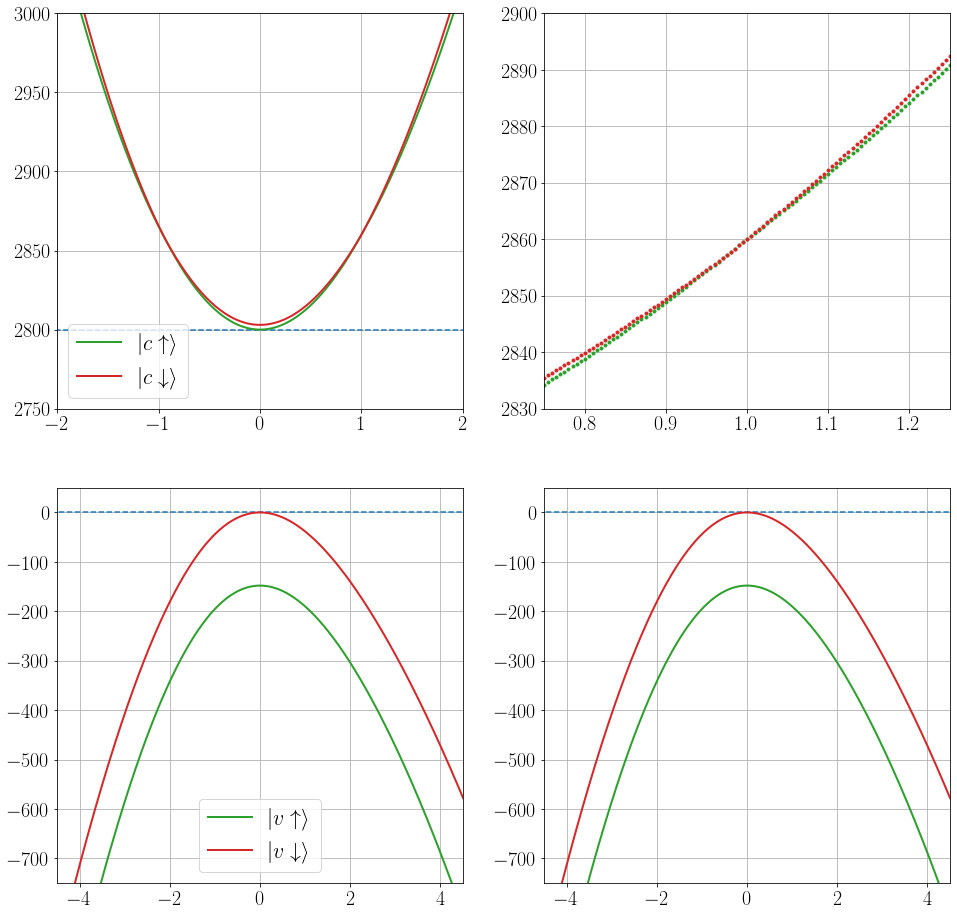

0

In [10]:
# Changing the values for the Rashba SOC
params['alpha_Rashba_c'] = 0 # meV nm
params['alpha_Rashba_v'] = 0 # meV nm

# Defining the Hamiltonian
hamiltonian = Ham(**params)


# K-SPACE DEFINITION:
Lk = 5   # 1/nm
Nk = 2001
kx = np.linspace(-Lk, Lk, Nk) # 1/AA
Nstates = hamiltonian.condBands + hamiltonian.valeBands
Values  = np.empty((Nk, Nstates), dtype=float)
Vectors = np.empty((Nk, Nstates, Nstates), dtype=complex)

# CALCULATION OF THE EIGENVALUES AND THE EIGENVECTORS
for i in range(len(kx)):
    Values[i,:], Vectors[i,:,:] = LA.eigh(hamiltonian.call(kx[i],0))

# REORGANIZE THE VECTORS AND THE VALUES
# Values, Vectors = bs.split_states(Values, Vectors)

# PLOT THE BANDS
bs.plot_kormanyos_fabian_bands(kx, Values)

In [10]:
Values_new, Vectors_new = bs.split_states(Values, Vectors)

(2001, 4)
(2001, 4, 4)


In [11]:
np.where(kx==0)

(array([1000]),)

In [12]:
Vectors.shape

(2001, 4, 4)

In [13]:
Vectors_new.shape

(2001, 4, 4)

In [14]:
Values.shape

(2001, 4)

In [15]:
Values[600,:]

array([-342.4629515 , -180.0699857 , 3050.54359392, 3073.38934481])

In [16]:
np.sum(np.abs(Vectors[598,:,-1])**2)

0.9999999999999999

In [17]:
for v in Vectors[599,:,-2]:
    print(np.abs(v)**2)
    
vec = Vectors[599,:,-2]
print(vec @ Σ_z @ vec)

0.006749427239119314
0.017605990993672146
0.25084697703003034
0.7247976047371778
(0.9999999999999996-2.760439211702001e-14j)


In [18]:
np.abs(vec)**2

array([0.00674943, 0.01760599, 0.25084698, 0.7247976 ])

In [19]:
vec.conj() @ Σ_z @ vec

(-0.48480719146170026+0j)

## Spin-projection calculation

In [20]:
S_x = avg_op_bands(Σ_x, Vectors)
S_y = avg_op_bands(Σ_y, Vectors)
S_z = avg_op_bands(Σ_z, Vectors)

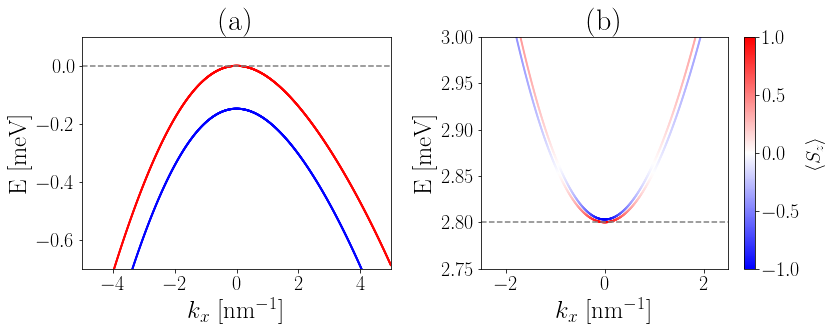

In [21]:
## Visualization of spin_z-projection:
fig, ax = plt.subplots(ncols=2,figsize=(12,5))
ax[0].scatter(kx, 1e-3*Values[:,0], c=S_z[:,0].real, s=1, cmap='bwr', vmax=1, vmin=-1)
valence=ax[0].scatter(kx, 1e-3*Values[:,1], c=S_z[:,1].real, s=1, cmap='bwr', vmax=1, vmin=-1)
ax[0].axhline(y=0, ls='--', c='gray')
ax[0].set_xlim(-5,5)
ax[0].set_ylim(-0.7,0.1)
ax[0].set_xlabel(r'$k_x$ [nm$^{-1}$]', fontsize=25)
ax[0].set_ylabel(r'E [meV]', fontsize=25)
ax[0].set_title('(a)', fontsize=30)


ax[1].scatter(kx, 1e-3*Values[:,2], c=S_z[:,2].real, s=1, cmap='bwr', vmax=1, vmin=-1)
conduction = ax[1].scatter(kx, 1e-3*Values[:,3], c=S_z[:,3].real, s=1, cmap='bwr', vmax=1, vmin=-1)
# plt.colorbar(conduction)
ax[1].axhline(y=1e-3*hamiltonian.Egap, ls='--', c='gray')
ax[1].set_xlim(-2.5,2.5)
ax[1].set_ylim(2.75,3.0)
ax[1].set_xlabel(r'$k_x$ [nm$^{-1}$]', fontsize=25)
ax[1].set_ylabel(r'E [meV]', fontsize=25)
ax[1].set_title('(b)', fontsize=30)


cbar1=fig.colorbar(conduction, ax=ax[1])
cbar1.set_label(r'$\langle S_z \rangle$', size=20)

plt.tight_layout()
plt.savefig('bands_and_sz_spin_colorbar.png', dpi=200)

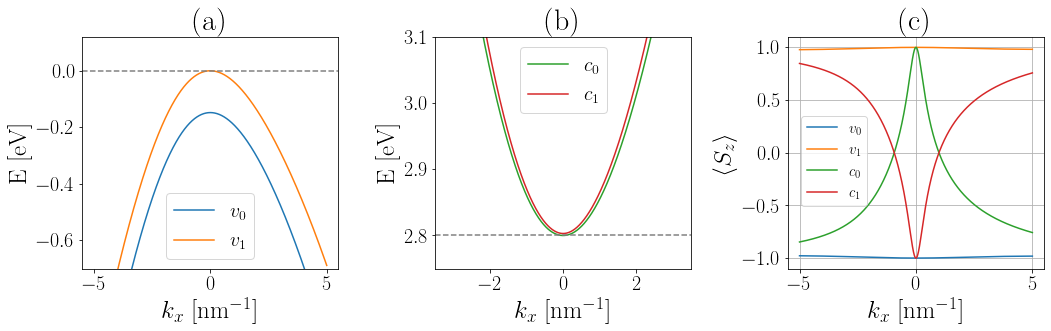

In [22]:
## Another visualization of spin_z-projection: 
fig, ax = plt.subplots(ncols=3, figsize=(15,5))

ax[0].plot(kx, 1e-3 * Values[:,0].real, label=r'$v_0$')
ax[0].plot(kx, 1e-3 * Values[:,1].real, label=r'$v_1$')
ax[0].axhline(y=0, ls='--', color='gray')
# ax[0].text(0.1, 0.98,'(a)', fontsize=30,
#      horizontalalignment='center',
#      verticalalignment='top',
#      transform = ax[0].transAxes)
ax[0].set_title('(a)', fontsize=30)
ax[0].set_ylim(-.700,.120)
ax[0].legend(fontsize=20)
ax[0].set_xlabel(r'$k_x$ [nm$^{-1}$]', fontsize=25)
ax[0].set_ylabel(r'E [eV]', fontsize=25)
ax[0].tick_params(labelsize=20)
# ax[0].grid()

ax[1].plot(kx, 1e-3 * Values[:,2].real, color='C2', label=r'$c_0$')
ax[1].plot(kx, 1e-3 * Values[:,3].real, color='C3', label=r'$c_1$')
ax[1].axhline(y=1e-3*hamiltonian.Egap, ls='--', color='gray')
ax[1].set_xlim(-3.5, 3.5)
ax[1].set_ylim(2.75, 3.1)
ax[1].set_xlabel(r'$k_x$ [nm$^{-1}$]', fontsize=25)
ax[1].set_ylabel(r'E [eV]', fontsize=25)
ax[1].tick_params(labelsize=20)
# ax[1].text(0.1, 0.98,'(b)', fontsize=30,
#      horizontalalignment='center',
#      verticalalignment='top',
#      transform = ax[1].transAxes)
ax[1].set_title('(b)', fontsize=30)
# ax[1].legend(fontsize=20,loc=(0.7,0.2))
ax[1].legend(fontsize=20,loc=0)


ax[2].plot(kx, S_z[:,0].real, label=r'$v_0$')
ax[2].plot(kx, S_z[:,1].real, label=r'$v_1$')
ax[2].plot(kx, S_z[:,2].real, label=r'$c_0$')
ax[2].plot(kx, S_z[:,3].real, label=r'$c_1$')
ax[2].legend(fontsize=15, loc=(0.05,0.27))
ax[2].set_title('(c)', fontsize=30)
ax[2].set_xlabel(r'$k_x$ [nm$^{-1}$]', fontsize=25)
ax[2].set_ylabel(r'$\langle S_z \rangle$', fontsize=25)
ax[2].tick_params(labelsize=20)
ax[2].grid()

plt.tight_layout()
# plt.savefig("bands_kormanyos_with_rashba_soc_MoS2.png", dpi=200)

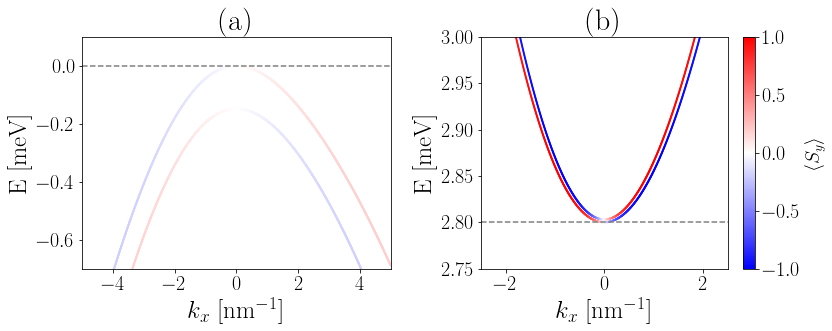

In [23]:
## Spin-y projection
fig, ax = plt.subplots(ncols=2,figsize=(12,5))
ax[0].scatter(kx, 1e-3*Values[:,0], c=S_y[:,0].real, s=1, cmap='bwr', vmax=1, vmin=-1)
valence=ax[0].scatter(kx, 1e-3*Values[:,1], c=S_y[:,1].real, s=1, cmap='bwr', vmax=1, vmin=-1)
ax[0].axhline(y=0, ls='--', c='gray')
ax[0].set_xlim(-5,5)
ax[0].set_ylim(-0.7,0.1)
ax[0].set_xlabel(r'$k_x$ [nm$^{-1}$]', fontsize=25)
ax[0].set_ylabel(r'E [meV]', fontsize=25)
ax[0].set_title('(a)', fontsize=30)

ax[1].scatter(kx, 1e-3*Values[:,2], c=S_y[:,2].real, s=1, cmap='bwr', vmax=1, vmin=-1)
conduction = ax[1].scatter(kx, 1e-3*Values[:,3], c=S_y[:,3].real, s=1, cmap='bwr', vmax=1, vmin=-1)
# plt.colorbar(conduction)
ax[1].axhline(y=1e-3*hamiltonian.Egap, ls='--', c='gray')
ax[1].set_xlim(-2.5,2.5)
ax[1].set_ylim(2.75,3.0)
ax[1].set_xlabel(r'$k_x$ [nm$^{-1}$]', fontsize=25)
ax[1].set_ylabel(r'E [meV]', fontsize=25)
ax[1].set_title('(b)', fontsize=30)

cbar1=fig.colorbar(conduction, ax=ax[1])
cbar1.set_label(r'$\langle S_y \rangle$', size=20)

plt.tight_layout()
# plt.savefig('bands_and_sx_spin_colorbar.png', dpi=200)

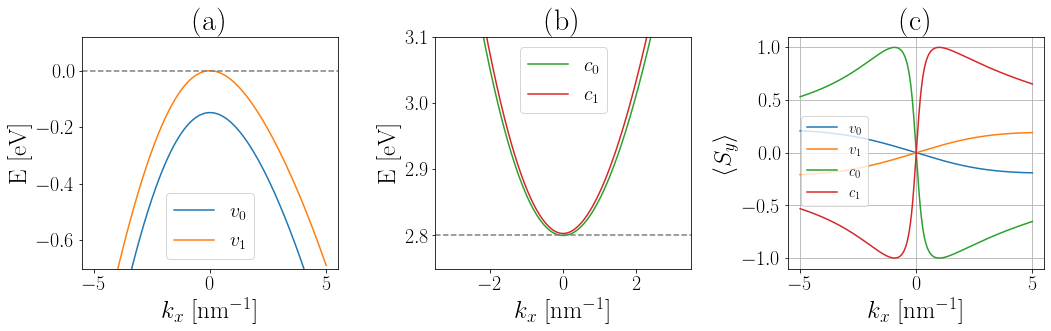

In [24]:
## Another visualization of spin_z-projection: 
fig, ax = plt.subplots(ncols=3, figsize=(15,5))

ax[0].plot(kx, 1e-3 * Values[:,0].real, label=r'$v_0$')
ax[0].plot(kx, 1e-3 * Values[:,1].real, label=r'$v_1$')
ax[0].axhline(y=0, ls='--', color='gray')
# ax[0].text(0.1, 0.98,'(a)', fontsize=30,
#      horizontalalignment='center',
#      verticalalignment='top',
#      transform = ax[0].transAxes)
ax[0].set_title('(a)', fontsize=30)
ax[0].set_ylim(-.700,.120)
ax[0].legend(fontsize=20)
ax[0].set_xlabel(r'$k_x$ [nm$^{-1}$]', fontsize=25)
ax[0].set_ylabel(r'E [eV]', fontsize=25)
ax[0].tick_params(labelsize=20)
# ax[0].grid()

ax[1].plot(kx, 1e-3 * Values[:,2].real, color='C2', label=r'$c_0$')
ax[1].plot(kx, 1e-3 * Values[:,3].real, color='C3', label=r'$c_1$')
ax[1].axhline(y=1e-3*hamiltonian.Egap, ls='--', color='gray')
ax[1].set_xlim(-3.5, 3.5)
ax[1].set_ylim(2.75, 3.1)
ax[1].set_xlabel(r'$k_x$ [nm$^{-1}$]', fontsize=25)
ax[1].set_ylabel(r'E [eV]', fontsize=25)
ax[1].tick_params(labelsize=20)
# ax[1].text(0.1, 0.98,'(b)', fontsize=30,
#      horizontalalignment='center',
#      verticalalignment='top',
#      transform = ax[1].transAxes)
ax[1].set_title('(b)', fontsize=30)
# ax[1].legend(fontsize=20,loc=(0.7,0.2))
ax[1].legend(fontsize=20,loc=0)


ax[2].plot(kx, S_y[:,0].real, label=r'$v_0$')
ax[2].plot(kx, S_y[:,1].real, label=r'$v_1$')
ax[2].plot(kx, S_y[:,2].real, label=r'$c_0$')
ax[2].plot(kx, S_y[:,3].real, label=r'$c_1$')
ax[2].legend(fontsize=15, loc=(0.05,0.27))
ax[2].set_title('(c)', fontsize=30)
ax[2].set_xlabel(r'$k_x$ [nm$^{-1}$]', fontsize=25)
ax[2].set_ylabel(r'$\langle S_y \rangle$', fontsize=25)
ax[2].tick_params(labelsize=20)
ax[2].grid()

plt.tight_layout()
# plt.savefig("bands_kormanyos_with_rashba_soc_MoS2.png", dpi=200)

### Spin projections

In [55]:
## Definitions for the grid and placeholders for the results:
Kx, Ky = np.meshgrid(kx, kx)          # Square k-space
EigVals = np.empty((4, *Kx.shape))    # States {v0, v1, c0, c1}; kx; ky 
EigVecs = np.empty((4, 4, *Kx.shape), dtype=complex) # Columns {v0, v1, c0, c1}; kx; ky

In [56]:
ky = kx
for ki in range(len(kx)):
    for kj in range(len(ky)):
        w, v = LA.eigh(hamiltonian.call(kx[ki], ky[kj]))
        EigVals[ :, kj, ki] = w
        EigVecs[ :, :, kj, ki] = v

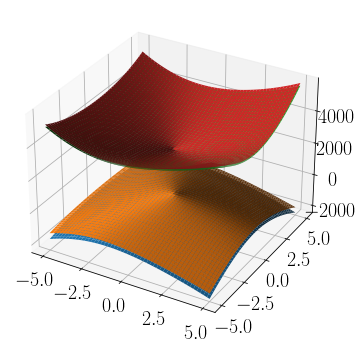

In [57]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
# Plot a 3D surface
ax.plot_surface(Kx, Ky, EigVals[0,:,:])
ax.plot_surface(Kx, Ky, EigVals[1,:,:])
ax.plot_surface(Kx, Ky, EigVals[2,:,:])
ax.plot_surface(Kx, Ky, EigVals[3,:,:]);

In [58]:
vcut = 2.9e3
Zcut = EigVals[3,:,:] <= vcut
Zcut2 = EigVals[2,:,:] <= vcut

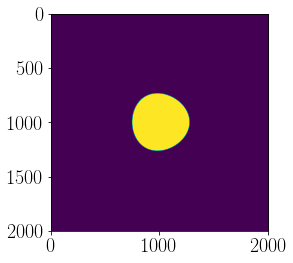

In [59]:
plt.imshow(Zcut2)

In [60]:
def is_boundary(Zcut, i, j, Lx, Ly):
    upper = Zcut[(j+1)%Ly , i]
    lower = Zcut[(j-1)%Ly , i]
    left  = Zcut[ j, (i-1)%Lx]
    right = Zcut[ j, (i+1)%Lx]
    site  = Zcut[j,i]
    level = site * (upper + lower + right + left + site)
    return 0 < level < 5 

def get_boundary(Zcut):
    Ly, Lx = Zcut.shape
    Zboundary = np.empty_like(Zcut)
    for j in range(Ly):
        for i in range(Lx):
            Zboundary[j,i] = is_boundary(Zcut, i, j, Lx, Ly)
    return Zboundary

In [61]:
Zboundary = get_boundary(Zcut.astype(int))
Zboundary2 = get_boundary(Zcut2.astype(int))

In [62]:
kx_inds = [np.where(kx == kx_cut) for kx_cut in Kx[Zboundary.astype(bool)]]
ky_inds = [np.where(ky == ky_cut) for ky_cut in Ky[Zboundary.astype(bool)]]

kx_inds_2 = [np.where(kx == kx_cut) for kx_cut in Kx[Zboundary2.astype(bool)]]
ky_inds_2 = [np.where(ky == ky_cut) for ky_cut in Ky[Zboundary2.astype(bool)]]

In [63]:
Sx_array_cut = np.empty(len(kx_inds), dtype=float)
Sy_array_cut = np.empty(len(ky_inds), dtype=float)
Sz_array_cut = np.empty(len(ky_inds), dtype=float)

for i in range(len(kx_inds)):
    Sx_array_cut[i] = avg_operator(Σ_x, EigVecs[:,3, ky_inds[i], kx_inds[i]][:,0,0]).real
    Sy_array_cut[i] = avg_operator(Σ_y, EigVecs[:,3, ky_inds[i], kx_inds[i]][:,0,0]).real
    Sz_array_cut[i] = avg_operator(Σ_z, EigVecs[:,3, ky_inds[i], kx_inds[i]][:,0,0]).real

In [64]:
Sx_array_cut2 = np.empty(len(kx_inds_2), dtype=float)
Sy_array_cut2 = np.empty(len(ky_inds_2), dtype=float)
Sz_array_cut2 = np.empty(len(ky_inds_2), dtype=float)

for i in range(len(kx_inds_2)):
    Sx_array_cut2[i] = avg_operator(Σ_x, EigVecs[:,2, ky_inds_2[i], kx_inds_2[i]][:,0,0]).real
    Sy_array_cut2[i] = avg_operator(Σ_y, EigVecs[:,2, ky_inds_2[i], kx_inds_2[i]][:,0,0]).real
    Sz_array_cut2[i] = avg_operator(Σ_z, EigVecs[:,2, ky_inds_2[i], kx_inds_2[i]][:,0,0]).real

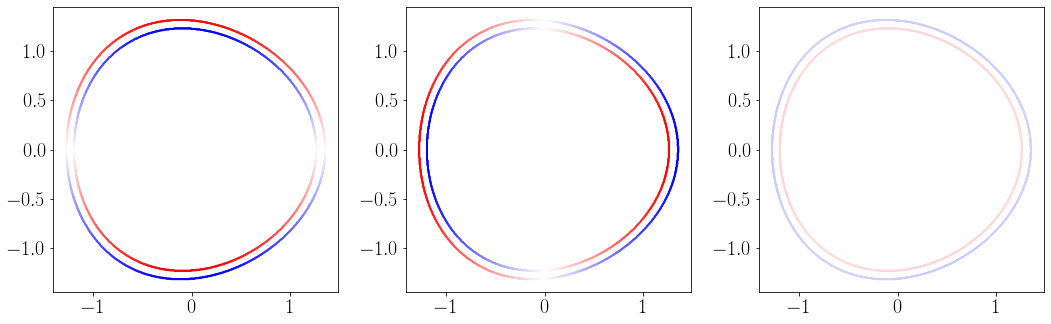

In [65]:
fig, ax = plt.subplots(ncols=3, figsize=(15,5))
# ax[0].contour(Kx,Ky,EigVals[2,:,:], levels=[2.9e3])
# ax[0].plot(Kx[Zboundary2.astype(bool)], Ky[Zboundary2.astype(bool)], ',')
ax[0].scatter(Kx[Zboundary.astype(bool)], Ky[Zboundary.astype(bool)], c=Sx_array_cut, 
            s=1, cmap='bwr', vmax=1, vmin=-1)
ax[0].scatter(Kx[Zboundary2.astype(bool)], Ky[Zboundary2.astype(bool)], c=Sx_array_cut2, 
            s=1, cmap='bwr', vmax=1, vmin=-1)
ax[0].set_aspect('equal')

ax[1].scatter(Kx[Zboundary.astype(bool)], Ky[Zboundary.astype(bool)], c=Sy_array_cut, 
            s=1, cmap='bwr', vmax=1, vmin=-1)
ax[1].scatter(Kx[Zboundary2.astype(bool)], Ky[Zboundary2.astype(bool)], c=Sy_array_cut2, 
            s=1, cmap='bwr', vmax=1, vmin=-1)
ax[1].set_aspect('equal')

ax[2].scatter(Kx[Zboundary.astype(bool)], Ky[Zboundary.astype(bool)], c=Sz_array_cut, 
            s=1, cmap='bwr', vmax=1, vmin=-1)
ax[2].scatter(Kx[Zboundary2.astype(bool)], Ky[Zboundary2.astype(bool)], c=Sz_array_cut2, 
            s=1, cmap='bwr', vmax=1, vmin=-1)
ax[2].set_aspect('equal')
plt.tight_layout()
# plt.contour(Kx,Ky,EigVals[2,:,:], levels=[3.9e3])

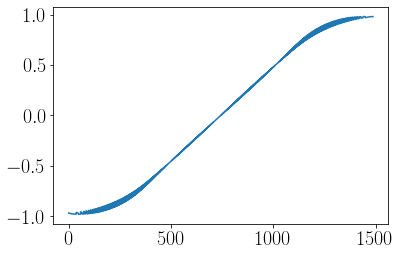

In [54]:
plt.plot(Sx_array_cut2)

In [36]:
k_spin = np.linspace(-5,5,101)
Kx_spin, Ky_spin = np.meshgrid(k_spin,k_spin)
EigVals_spin = np.empty((4, *Kx_spin.shape))    # States{v0, v1, c0, c1}; kx; ky 
EigVecs_spin = np.empty((4, 4, *Kx_spin.shape), dtype=complex) # Columns {v0, v1, c0, c1}; kx; ky

In [37]:
for ki in range(len(k_spin)):
    for kj in range(len(k_spin)):
        w, v = LA.eigh(hamiltonian.call(k_spin[ki], k_spin[kj]))
        EigVals_spin[ :, kj, ki] = w
        EigVecs_spin[ :, :, kj, ki] = v

In [38]:
Zcut_spin = EigVals_spin[3,:,:] <= vcut 
Zboundary_spin = get_boundary(Zcut_spin.astype(int))

In [39]:
kx_inds_spin = [np.where(k_spin == kx_cut) for kx_cut in Kx_spin[Zboundary_spin.astype(bool)]]
ky_inds_spin = [np.where(k_spin == ky_cut) for ky_cut in Ky_spin[Zboundary_spin.astype(bool)]]

In [40]:
Sx_array_cut = np.empty(len(kx_inds_spin), dtype=float)
Sy_array_cut = np.empty(len(ky_inds_spin), dtype=float)
Sz_array_cut = np.empty(len(ky_inds_spin), dtype=float)

for i in range(len(kx_inds_spin)):
    Sx_array_cut[i] = avg_operator(Σ_x, EigVecs_spin[:,3, ky_inds_spin[i], kx_inds_spin[i]][:,0,0]).real
    Sy_array_cut[i] = avg_operator(Σ_y, EigVecs_spin[:,3, ky_inds_spin[i], kx_inds_spin[i]][:,0,0]).real
    Sz_array_cut[i] = avg_operator(Σ_z, EigVecs_spin[:,3, ky_inds_spin[i], kx_inds_spin[i]][:,0,0]).real

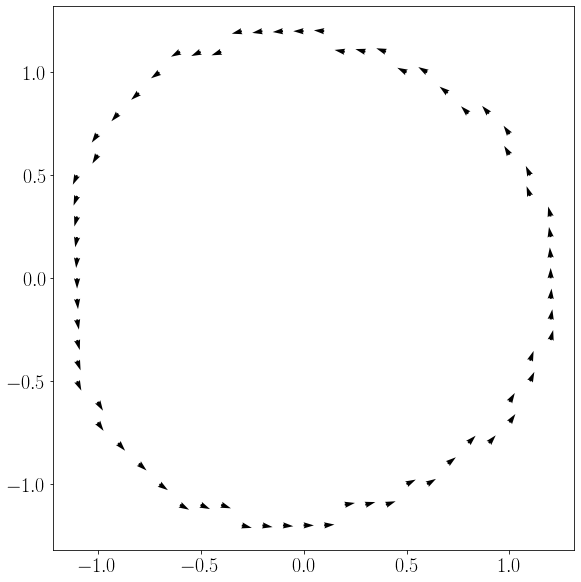

In [41]:
# plt.contour(Kx,Ky,EigVals[3,:,:], levels=[3.9e3])
plt.figure(figsize=(10,10))
# plt.plot(Kx_spin[Zboundary_spin.astype(bool)], Ky_spin[Zboundary_spin.astype(bool)],'o')
plt.quiver(Kx_spin[Zboundary_spin.astype(bool)], Ky_spin[Zboundary_spin.astype(bool)],
           Sx_array_cut, Sy_array_cut, scale=50)
plt.gca().set_aspect('equal')